In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

C:\Users\Tushar\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
features = df.drop(['stab', 'stabf'], axis = 1)
target = df['stabf']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=1)

In [ ]:
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(sc.transform(x_test), columns=x_test.columns)

In [ ]:
#q1

#Precision = TP/(TP + FP) 
p = 355/(355 + 1480)

#Recall = TP/(TP + FN)
r = 355/(355 + 45)

f1 = 2*(p*r)/(p + r)

round(f1, 4)

0.3177

In [ ]:
#q4
# Recall = TP / (TP + FN)
# False Positive Rate = FP / (FP + TN)
# Cost = 5 * FP + FN

print('Option A')
print(f'Recall: {82 / (82 + 18)}')
print(f'False Positive Rate: {2 / (2 + 98)}')
print(f'Costs: {5 * 2 + 18}\n')

print('Option B')
print(f'Recall: {79 / (79 + 21)}')
print(f'False Positive Rate: {round(1 / (1 + 91), 2)}')
print(f'Costs: {5 * 1 + 21} \n')

print('Option C')
print(f'Recall: {90 / (90 + 10)}')
print(f'False Positive Rate: {4 / (4 + 96)}')
print(f'Costs: {5 * 4 + 10} \n')

print('Option D')
print(f'Recall: {78 / (78 + 22)}')
print(f'False Positive Rate: {9 / (9 + 91)}')
print(f'Costs: {5 * 9 + 22}\n')

Option A
Recall: 0.82
False Positive Rate: 0.02
Costs: 28

Option B
Recall: 0.79
False Positive Rate: 0.01
Costs: 26 

Option C
Recall: 0.9
False Positive Rate: 0.04
Costs: 30 

Option D
Recall: 0.78
False Positive Rate: 0.09
Costs: 67



In [ ]:
#q14
forestClassifier = RandomForestClassifier(random_state=1)
forestClassifier.fit(x_train, y_train)
forest_pred = forestClassifier.predict(x_test)

round(accuracy_score(y_test, forest_pred), 4)

0.8905

In [ ]:
#q15
xgbClassifier = XGBClassifier(random_state=1)
xgbClassifier.fit(x_train, y_train)
xgb_pred = xgbClassifier.predict(x_test)

round(accuracy_score(y_test, xgb_pred), 4)

C:\Users\Tushar\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:49:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Tushar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9455

In [ ]:
#q16
lgbmClassifier = LGBMClassifier(random_state=1)
lgbmClassifier.fit(x_train, y_train)
lgbm_pred = lgbmClassifier.predict(x_test)

round(accuracy_score(y_test, lgbm_pred), 4)

C:\Users\Tushar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9395

In [ ]:
#q17
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
para_dist = {'n_estimators': n_estimators,'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,'max_features': max_features}

ext_clf = ExtraTreesClassifier(random_state=1)
randomised_grid_search = RandomizedSearchCV(ext_clf, param_distributions= para_dist,
                                scoring='accuracy',
                                n_iter=10,
                                cv=5,
                                n_jobs=-1,
                                verbose=1,
                                random_state=1)

randomised_grid_search.fit(x_train, y_train)
randomised_grid_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
#q18
ext_clf.fit(x_train, y_train)
print(round(accuracy_score(y_test, ext_clf.predict(x_test)), 4))

new_model = randomised_grid_search.best_estimator_
new_model.fit(x_train, y_train)
new_pred = new_model.predict(x_test)
round(accuracy_score(y_test, new_pred), 4)

0.8915


0.927

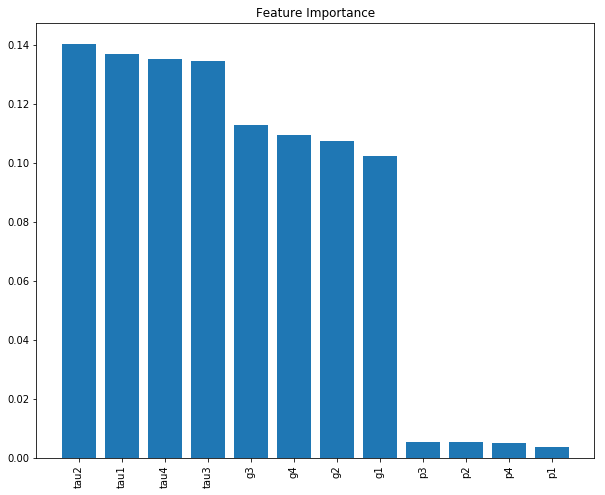

In [ ]:
#q20
feature_importances = new_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [x_train.columns[i] for i in indices]

plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), feature_importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()